# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 7.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
249928,0.0073,0.0024,0.0024,0.0024,0.0122,0.2539,0.1611,0.1782,0.0024,0.1563,0,0,0,0
324158,0.0024,0.0415,0.0024,0.0024,0.0049,0.2979,0.3809,0.1367,0.0024,0.5298,0,0,0,0
333641,0.0024,0.1001,0.0610,0.0317,0.0952,0.3711,0.8789,0.3271,0.1099,0.4688,6,6,10,10
251360,0.0537,0.0049,0.0024,0.0122,0.1050,0.6592,0.3979,0.3467,0.0024,0.2100,9,9,1,1
273347,0.0024,0.6152,0.0464,0.0098,0.0171,0.2173,1.3257,1.3403,0.4468,0.2222,3,3,4,4


In [3]:
raw_data.shape

(465343, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465343 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          465343 non-null  float64
 1   Emg2          465343 non-null  float64
 2   Emg3          465343 non-null  float64
 3   Emg4          465343 non-null  float64
 4   Emg5          465343 non-null  float64
 5   Emg6          465343 non-null  float64
 6   Emg7          465343 non-null  float64
 7   Emg8          465343 non-null  float64
 8   Emg9          465343 non-null  float64
 9   Emg10         465343 non-null  float64
 10  repetition    465343 non-null  int64  
 11  rerepetition  465343 non-null  int64  
 12  stimulus      465343 non-null  int64  
 13  restimulus    465343 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000
mean,0.016418,0.174769,0.072729,0.029455,0.045257,0.323000,0.492774,0.348617,0.112679,0.320979,3.170298,2.318877,5.616943,4.164977
std,0.077547,0.405425,0.272274,0.071421,0.087363,0.445777,0.521808,0.422231,0.280829,0.225615,3.484652,3.300599,6.579710,6.287999
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.063500,0.185500,0.105000,0.002400,0.183100,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.012200,0.188000,0.346700,0.212400,0.004900,0.244100,2.000000,0.000000,3.000000,0.000000
75%,0.007300,0.163600,0.012200,0.019500,0.051300,0.388200,0.603000,0.429700,0.075700,0.412600,6.000000,5.000000,10.000000,8.000000
max,2.321800,4.665500,4.660600,1.892100,2.136200,4.665500,4.663100,4.665500,4.660600,3.398400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197148
4      15514
8      15513
2      15507
12     15503
7      15490
6      15486
9      15483
5      15470
11     15462
3      15455
1      15433
10     15427
13     10339
17     10337
14     10336
15     10304
16     10259
21      5166
18      5165
19      5160
20      5130
23      5130
22      5126
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

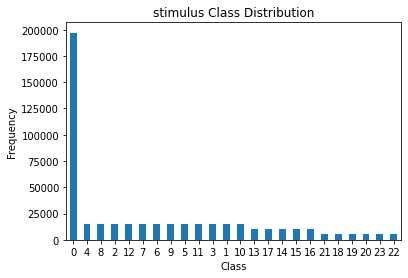

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
138927,0.0024,0.0024,0.0024,0.0024,0.0024,0.0513,0.2271,0.1172,0.0024,0.2295,0,0,0,0
185966,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.2539,0.1172,0.0024,0.2686,0,0,0,0
284726,0.0024,0.0977,0.0854,0.1074,0.1196,0.3369,0.8008,0.5469,0.0586,0.4980,6,6,5,5
25637,0.0024,0.5225,0.0049,0.0146,0.0513,1.6748,0.6567,0.3027,0.1318,0.2246,1,1,4,4
422773,0.0391,0.0024,0.0024,0.0024,0.0073,0.2368,0.0244,0.0317,0.0024,0.1953,0,0,0,0


In [12]:
raw_data.shape

(387008, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387008 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          387008 non-null  float64
 1   Emg2          387008 non-null  float64
 2   Emg3          387008 non-null  float64
 3   Emg4          387008 non-null  float64
 4   Emg5          387008 non-null  float64
 5   Emg6          387008 non-null  float64
 6   Emg7          387008 non-null  float64
 7   Emg8          387008 non-null  float64
 8   Emg9          387008 non-null  float64
 9   Emg10         387008 non-null  float64
 10  repetition    387008 non-null  int64  
 11  rerepetition  387008 non-null  int64  
 12  stimulus      387008 non-null  int64  
 13  restimulus    387008 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [17]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [18]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.835945,-0.749715,-0.429196,-0.830931
1,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.827101,-0.760588,-0.429196,-0.830931
2,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.827101,-0.771460,-0.429196,-0.820702
3,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.831613,-0.776785,-0.429196,-0.778936
4,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.840457,-0.782332,-0.429196,-0.758052
...,...,...,...,...,...,...,...,...,...,...
387003,0.360693,-0.225807,-0.266581,-0.410858,-0.389514,-0.322272,-0.946216,-0.831146,-0.082610,-1.247319
387004,0.604777,-0.220085,-0.266581,-0.410858,-0.257738,-0.158232,-0.946216,-0.831146,-0.082610,-1.257548
387005,0.757486,-0.220085,-0.266581,-0.410858,-0.232025,-0.112293,-0.946216,-0.831146,-0.082610,-1.278431
387006,0.757486,-0.220085,-0.266581,-0.410858,-0.284522,-0.153198,-0.946216,-0.831146,-0.082610,-1.309543


In [19]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# KNeighborsClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = KNeighborsClassifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 93.76243507919692


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     39037
           1       0.90      0.91      0.90      2203
           2       0.89      0.83      0.86      2428
           3       0.91      0.85      0.88      2206
           4       0.95      0.89      0.92      2160
           5       0.92      0.93      0.93      1972
           6       0.94      0.92      0.93      2193
           7       0.91      0.89      0.90      2070
           8       0.90      0.90      0.90      2293
           9       0.89      0.89      0.89      1921
          10       0.86      0.79      0.82      2093
          11       0.94      0.91      0.92      2006
          12       0.94      0.89      0.91      2165
          13       0.96      0.93      0.94      1405
          14       0.94      0.95      0.94      1393
          15       0.92      0.84      0.87      1663
          16       0.97      0.92      0.94      1693
 

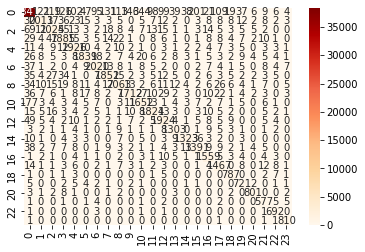

In [23]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.47270096379938503
MSE: 5.211079817058991
RMSE: 2.2827789680691803


In [25]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.9373134120707384
Recall Score :  0.9376243507919692
f1_score :  0.9369592426377464
